<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import libraries.


In [16]:
import pandas as pd
import seaborn as sns
import numpy as np

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [3]:
#check the feature
df["ConvertedComp"]

0         61000.0
1         95179.0
2         90000.0
3        455352.0
4         65277.0
           ...   
11393    130000.0
11394     19880.0
11395    105000.0
11396     80371.0
11397         NaN
Name: ConvertedComp, Length: 11398, dtype: float64

<Axes: ylabel='Density'>

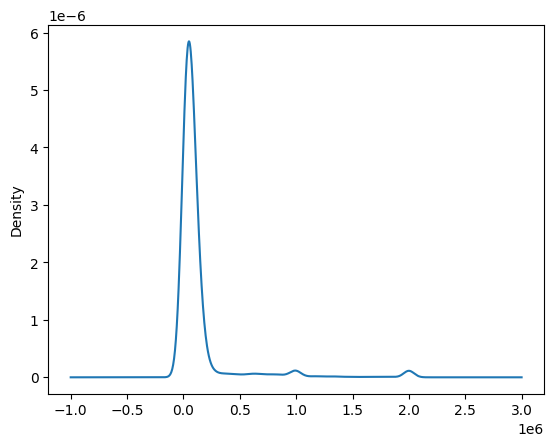

In [4]:
#plot the distribution curve
df["ConvertedComp"].plot(kind='kde')

Plot the histogram for the column `ConvertedComp`.


<Axes: ylabel='Frequency'>

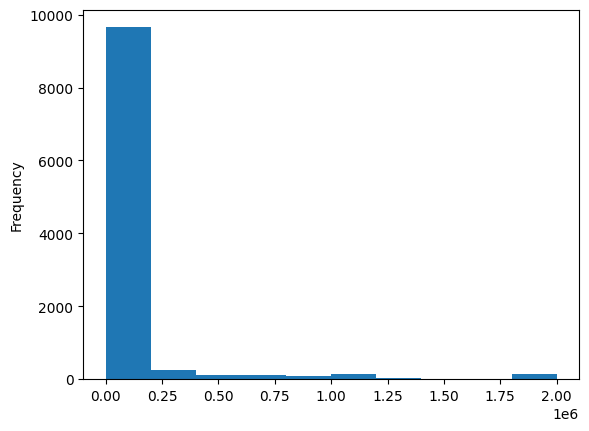

In [5]:
#plot histogram
df["ConvertedComp"].plot(kind='hist')

What is the median of the column `ConvertedComp`?


In [6]:
#check the median value
df["ConvertedComp"].median()

57745.0

How many responders identified themselves only as a **Man**?


In [7]:
#check the total number of man responders
df["Gender"].value_counts()['Man']

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [8]:
#check the median value of woman responders
df_woman = df[df['Gender']=='Woman']
df_woman["ConvertedComp"].median()

57708.0

Give the five number summary for the column `Age`?


In [9]:
#summary of "Age" feature
df["Age"].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


<Axes: ylabel='Frequency'>

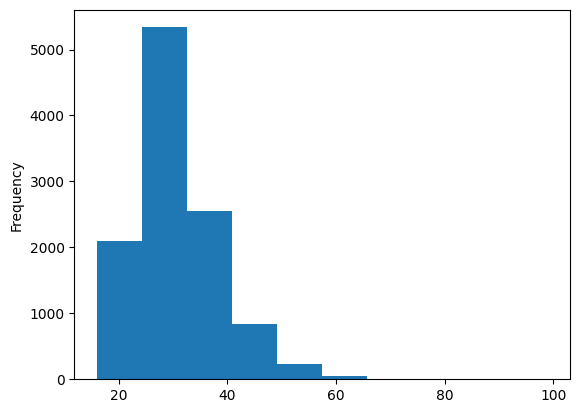

In [10]:
#plot histogram of age feature
df["Age"].plot(kind='hist')

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<Axes: xlabel='ConvertedComp'>

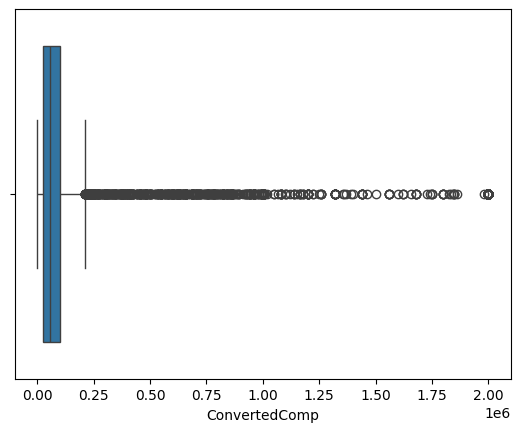

In [12]:
#check outliers
sns.boxplot(x = 'ConvertedComp', data = df)

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [13]:
df['ConvertedComp'].describe()

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

In [14]:
#find quartile range
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
print('The middle quartiles for ConvertedComp range from',Q1, 'to',Q3,'. The interquartile range is',IQR)

The middle quartiles for ConvertedComp range from 26868.0 to 100000.0 . The interquartile range is 73132.0


Find out the upper and lower bounds.


In [15]:
#find upper and lower bounds
min_val = df['ConvertedComp'].min()
max_val = df['ConvertedComp'].max()
print('The min/max for ConvertedComp are',min_val, 'and', max_val)

The min/max for ConvertedComp are 0.0 and 2000000.0


Identify how many outliers are there in the `ConvertedComp` column.


In [17]:
# Upper bound
upper = np.where(df['ConvertedComp'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['ConvertedComp'] <= (Q1-1.5*IQR))

0          3
1         13
2         45
3         46
4         60
       ...  
874    11296
875    11303
876    11350
877    11353
878    11369
Length: 879, dtype: int64

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [18]:
#create new dataframe by removing outliers
upper_limit = Q3+1.5*IQR
lower_limit = Q1-1.5*IQR
new_df = df[(df['ConvertedComp'] < upper_limit) & (lower_limit < df['ConvertedComp'])]
new_df.shape

(9703, 85)

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [19]:
#Detect correlation
new_df.corr()['Age']

<ipython-input-19-d746750180bf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_df.corr()['Age']


Respondent       0.002180
CompTotal        0.006337
ConvertedComp    0.401821
WorkWeekHrs      0.032032
CodeRevHrs      -0.012878
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
